# Replica project

### Clustering efforts



In [38]:
# loading the metadata
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from scipy import sparse
import pickle
import sys

import seaborn as sns

import sklearn

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}


sys.path.insert(0, "../model/")
from utils import *
from spatial_reranking import sim_matrix_rerank, make_embds_pooled, match_feature_maps_simple

sys.path.insert(0, "../web_annotation/")
from utils_clusters import *
from metrics_clusters import * 



path = '/home/guhennec/scratch/2021_Cini/TopologicalAnalysis_Cini/data/'
data_dir = '/scratch/students/schaerf/'
replica_dir = '/mnt/project_replica/datasets/cini/'
wga_dir = '/mnt/project_replica/datasets/WGA/'

path = '../data/'
data_dir = '../data/'
replica_dir = '../data/'
wga_dir = '../data/'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
type_clustering = 'gaussian_mixture'
type_clustering = 'kmeans'
type_clustering = 'mix'

dist = 1700
dist = 2000
dist2 = 0.12

data_file = 'original/dedup_data_sample_wga.csv' 
data_file = 'data_sample_0.csv'
data_file = 'data_sample.csv'

embeds_file = '01-05-2022/resnext-101_epoch_901-05-2022_19%3A45%3A03.npy'
embeds_file = '25-05-2022/resnext-101_epoch_2225-05-2022_23%3A44%3A19.npy'

map_file = '01-05-2022/map2pos.pkl'
map_file = '25-05-2022/map2pos.pkl'

cluster_file = '01-05-2022/clusters_'+type_clustering+'_'+str(dist)+'_01-05-2022_19.pkl'
cluster_file = '25-05-2022/clusters_'+type_clustering+'_'+str(dist)+'_25-05-2022_19.pkl'


In [40]:
morpho = pd.read_csv(data_dir + 'morphograph_clusters.csv')
embeds = np.load(data_dir + embeds_file, allow_pickle=True) 

morpho[morpho['type'].isin(['POSITIVE', 'NEGATIVE'])].tail(1)

,img1,img2,type,uid_connection,date,cluster_file,cluster
9102,1176b2b049e446c28e67e1f6ae42a7a2,d8532c4ccd484c349a5c7c1b3ca4a8af,NEGATIVE,1176b2b049e446c29a5c7c1b3ca4a8af,26-05-2022_18:18:54,25-05-2022/clusters_mix_2000_25-05-2022_19,1941


In [41]:
img1 = '05f5c4e0325f40019eeb0bb542c1f692'
img2 = '14a738ba9b91454a997738105ccf5c9b'
img3 = '5a889994248f4f67ad62057ceab2297d'

img0 = '279e34aca7474483a424b5c154719d51'
img2 = '359c34d1017e46be9f17a3b6a8a4dfb9'

# img1 = '03831e0f677d4c43ae34185065b93191'
# img2 = '5b18e18dfb5b49ceb98e0c36b1a8cec5'
# img3 = '683def2a2a19429799a6514bc7bd4156'

sklearn.metrics.pairwise.cosine_distances(embeds[embeds[:,0] == img0][0][1].reshape(1, -1), embeds[embeds[:,0] == img2][0][1].reshape(1, -1)), sklearn.metrics.pairwise.cosine_distances(embeds[embeds[:,0] == img1][0][1].reshape(1, -1), embeds[embeds[:,0] == img3][0][1].reshape(1, -1))

(array([[0.08652782]], dtype=float32), array([[0.09683412]], dtype=float32))

In [36]:
clusters = make_clusters_embeddings(data_dir, dist=dist, data_file=data_file, embed_file=embeds_file, type_clustering=type_clustering, dist2=dist2)

remove outliers with dbscan and cluster with kmeans
0.12
3898
(5171, 2)
422     17
221     16
1153    15
82      13
409     12
        ..
1655     1
1151     1
450      1
1615     1
492      1
Name: cluster, Length: 1700, dtype: int64 1700
(5171, 3)
(5171, 5)


In [37]:
with open(data_dir + cluster_file, 'wb') as outfile:
    pickle.dump(clusters, outfile)

In [42]:
positives = update_morph(data_dir)
novelty_scores = novelty_score(positives, '25-05')
novelty_scores

(39983, 20)
(39983, 22)
(6899, 6)


{'original size': 1873,
 'newly added': 119,
 'additions to existing clusters': 46,
 'number of clusters with new elements': 37,
 'new clusters': 36,
 'new clusters elements': 73,
 'progress': '6.35%'}

In [43]:
metadata = pd.read_csv(data_dir + 'data_sample.csv')
metadata = metadata.drop(columns=['img1', 'img2', 'type', 'annotated', 'index', 'cluster', 'set', 'uid_connection'])


In [44]:
positives.sample()

,uid,uid_connection,index,AuthorOriginal,Description,AuthorBirth,path,BeginDate,ImageURL,City,...,img1,img2,type,annotated,cluster_file,cluster,set,new_cluster,new set,old_cluster old
795,5d93cc78096840909ff14698e2a6cf07,f1279f5488fc4b50baf5d7574b8a35fa,8687.0,"VERONESE, Paolo. (maniera di-).",Il Matrimonio di S. Caterina.,1528.0,../data/34A/34A_122.jpg,1546.0,https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...,FIRENZE,...,5d93cc78096840909ff14698e2a6cf07,314e7d5377b147bd993a76d0b70a8d5b,POSITIVE,2018-05-10 12:39:38.538140+00:00,Original,740,train,740,train,751.0


In [47]:
embeddings = np.load(data_dir + embeds_file, allow_pickle=True) 
morpho_graph_clusters = pd.read_csv(data_dir + 'morphograph_clusters.csv')
morpho_graph_clusters = morpho_graph_clusters[morpho_graph_clusters['cluster_file'].str.contains('25-05')]
uid2path = {}
for i, row in metadata.iterrows():
    uid2path[row['uid']] = str(row['path'])


In [46]:
train_set = make_new_train_set(embeddings, positives, morpho_graph_clusters, '25-05', uid2path)
train_set

(3174, 7)


100%|██████████| 2118/2118 [00:48<00:00, 43.34it/s]

(3427, 7)
(1542, 7)
                                     A                                 B  \
2104  fea21cc9ad2f4436b46f03776fab5733  62067f864e1544fdb22f651e5b06d800   
2106  ff05a46c168b4b2cb7cacef2ec4ef48c  04297a08316c4e1aa3ff512ea44d0fc7   
2106  ff05a46c168b4b2cb7cacef2ec4ef48c  04297a08316c4e1aa3ff512ea44d0fc7   
2111  ff4befb0d4704a4bafb4c7e0ac7c9769  aba59a4dab044d5cada4a0a3dbc3acf3   
2115  ff7c7f6e16d645869e828e016234db4d  cf9937275cdf43b7bfab48034686c950   

                                     C     set  \
2104  a84c7d526eaf4dce9c25b88789b0f649     val   
2106  75cbde4ef4534f309bc760ca362790fc  no set   
2106  90aa26ad5e8948f29848f11d69fe0a7a  no set   
2111  46dfbdfd0584490c887ad0105300e820  no set   
2115  55604d8ed8464619bb7d3b580650648e  no set   

                                                 A_path  \
2104  ../data/WGA/images/g/girolamo/treviso/sleeping...   
2106                              ../data/2A/2A_381.jpg   
2106                              ../data/2A/

,A,B,C,set,A_path,B_path,C_path
14,01c9d15bc859434fa72380dae01ae476,8a16f89c2fe44bcbbcc1db5a5b946080,20f74a05cd7f41de884bf6e74eb0ea3d,train,../data/46A/46A_138.jpg,../data/67A/67A_70.jpg,../data/156C/156C_495.jpg
14,01c9d15bc859434fa72380dae01ae476,8a16f89c2fe44bcbbcc1db5a5b946080,2659b86f49284c7aa6fb276524c584fb,train,../data/46A/46A_138.jpg,../data/67A/67A_70.jpg,../data/15B/15B_192.jpg
18,023bd457b23f4752bdeaafafc9faee98,bf71d636f40b42b88cb2f3b5463e1cbe,7dbc2b881f2b49ca91b568a303983832,train,../data/121C/121C_101.jpg,../data/59C/59C_376.jpg,../data/46B/46B_523.jpg
19,026322746340445a8efe82e4ede8e7c7,8e60fecec01a4ed6a30c2f52595991f7,512f8c52936e4ac28b466199dcdfd0f6,train,../data/WGA/images/t/tironi/piazzett.jpg,../data/WGA/images/c/canalett/4/canal403.jpg,../data/WGA/images/m/mariesch/molobaci.jpg
19,026322746340445a8efe82e4ede8e7c7,8e60fecec01a4ed6a30c2f52595991f7,c896179193dc4b18be6ca9e11458fea5,train,../data/WGA/images/t/tironi/piazzett.jpg,../data/WGA/images/c/canalett/4/canal403.jpg,../data/WGA/images/c/canalett/8/canal801.jpg
...,...,...,...,...,...,...,...
2065,fa10a736b0804917b958334d82b05374,e577523a7fc74e1b8141404d3639e97b,2878b71b9a9240238b4ea330a00573bf,train,../data/88C/88C_423.jpg,../data/158A/158A_360.jpg,../data/57A/57A_742.jpg
2071,fb030ef7fe4c4cc793fa86167fb1ddc7,17942f6b8f7b4431b47b4c7dd13230ce,7e5347fa9eeb42558c6d622909e248d8,train,../data/58A/58A_69.jpg,../data/WGA/images/t/tiziano/08b/4dian_c.jpg,../data/WGA/images/c/cort/2titian.jpg
2093,fd76f1957cb24051b7381cb4e0ba7e4a,69f5f3b2a30e4e0dbe394c758682e380,843194f9208f43b6a13a9ae802285749,train,../data/WGA/images/d/duccio/maesta/verso_2/ver...,../data/WGA/images/p/pietro/rimini/depositi.jpg,../data/WGA/images/d/duccio/maesta/verso_2/ver...
2095,fde0c792bbff45e080ada7bba810c08d,dfcc2fdc21ab4b9390da20853d48794c,67f486eccaf84b5ba5f16b8d0202cc35,train,../data/44B/44B_501.jpg,../data/41A/41A_791.jpg,../data/160A/160A_370.jpg


In [48]:
train_set.sample(5)

,A,B,C,set,A_path,B_path,C_path
990,7699bd54fb9a479d887437bb9b67a2f7,d5234e261fd549ba9539377d1e58f7d8,5e87d1dfceaf4ad48ea732333275e692,train,../data/WGA/images/h/heyden/townhal.jpg,../data/WGA/images/b/berckhey/gerrit/damsquax.jpg,../data/WGA/images/b/berckhey/gerrit/dam_squa.jpg
659,4d02860f58f2443ba4d1ef088756f854,cea37d0506e04d45b41f37bf0681ceca,ee14b8cfd1a84ffd9a7135ca3c5ba7ac,train,../data/21C/21C_228.jpg,../data/147B/147B_491.jpg,../data/61C/61C_274.jpg
1134,84aeef3b00a9410ea3552ee4f7231e70,47162a24caae4bb8bddde262f0b51ed3,52a0d09c77144e8d82367f0a2e8e7e56,train,../data/161B/161B_285.jpg,../data/112B/112B_218.jpg,../data/106A/106A_350.jpg
645,4b7e97d3847a4097b651790f6631cdb8,22bdccea9d214520b9844dde658b70b2,9c7162950d594840b6c21fba2d2145b9,train,../data/47A/47A_803.jpg,../data/47A/47A_857.jpg,../data/125B/125B_206.jpg
1249,9362d35d5c9b41339d289e305a913f1a,7c0da260dbb44199b45f6e97524f78be,233627b31c71433b83f397812b338420,train,../data/102B/102B_454.jpg,../data/121B/121B_577.jpg,../data/WGA/images/s/sadeler/aegidiu2/sebasti1...


In [49]:
scores_clusters = cluster_accuracy(morpho_graph_clusters)
scores_clusters

0.75

In [34]:
map2pos = get_2d_pos(data_dir, embed_file=embeds_file)
with open(data_dir + map_file, 'wb') as outfile:
    pickle.dump(map2pos, outfile)

In [3]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
# cluster_labels = clusterer.fit_predict(np.vstack(embeds[:,1]))

In [5]:
# clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
#                                       edge_alpha=0.6, 
#                                       node_size=80, 
#                                       edge_linewidth=2)

In [6]:
# clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

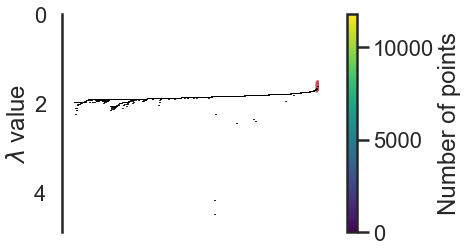

In [8]:
# clusterer.condensed_tree_.plot(select_clusters=True)

In [9]:
# g = clusterer.condensed_tree_.to_networkx()
# g.number_of_nodes()


13022

In [10]:
# clusterer.condensed_tree_.to_pandas().head()

,parent,child,lambda_val,child_size
0,11791,5789,1.359745,1
1,11791,7986,1.433397,1
2,11791,8699,1.458763,1
3,11791,613,1.460748,1
4,11791,5019,1.461480,1


In [12]:
# tree = clusterer.condensed_tree_.to_pandas()
# tree[tree.child_size > 1].head()

,parent,child,lambda_val,child_size
166,11791,11792,1.607527,11623
167,11791,11793,1.607527,2
715,11792,11794,1.660716,11074
716,11792,11795,1.660716,4
1071,11794,11796,1.677872,10721
